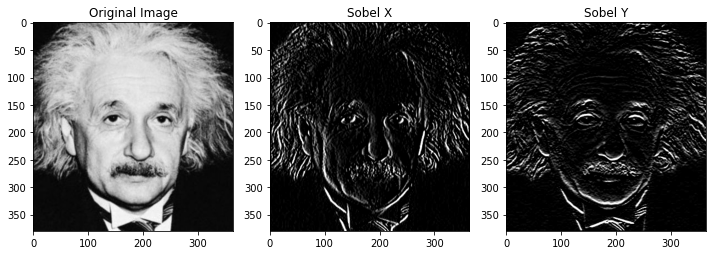

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)

# Define the Sobel operator kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

# Apply Sobel filtering using filter2D
sobel_x_filtered = cv2.filter2D(image, -1, sobel_x)
sobel_y_filtered = cv2.filter2D(image, -1, sobel_y)


# Display the original image, Sobel X, Sobel Y, and gradient magnitude images using matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_x_filtered, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 3, 3)
plt.imshow(sobel_y_filtered, cmap='gray')
plt.title('Sobel Y')


plt.tight_layout()
plt.show()


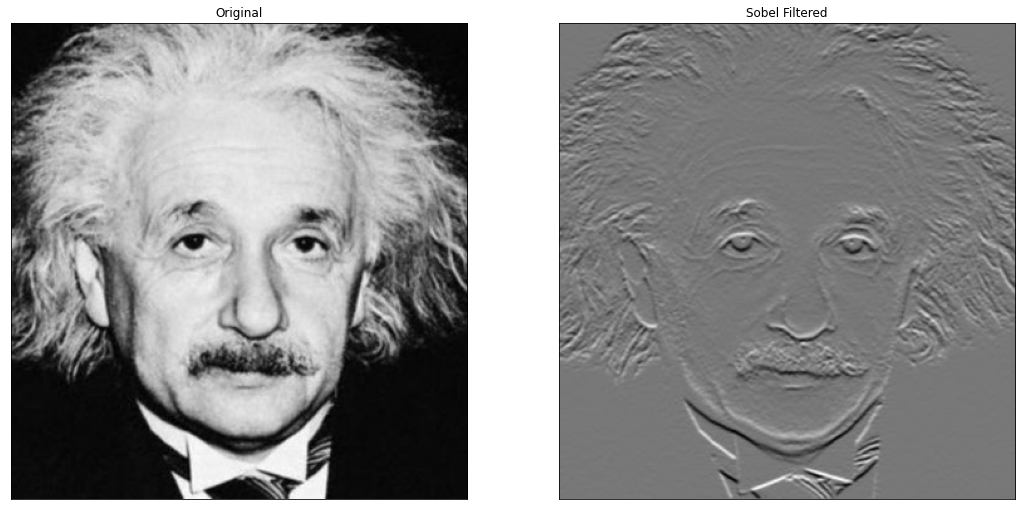

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in reduced grayscale
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

# Define the Sobel kernel
kernel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]], dtype='float32')

# Get the dimensions of the image and kernel
img_height, img_width = img.shape
kernel_size = kernel.shape[0]
# Create an empty output image
img_filtered = np.zeros_like(img, dtype=np.float32)
# Perform convolution using matrix multiplication and proper padding
padded_img = np.pad(img, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2)), mode='edge')
for i in range(img_height):
    for j in range(img_width):
        img_patch = padded_img[i:i + kernel_size, j:j + kernel_size]
        convolution_result = np.sum(img_patch * kernel)
        img_filtered[i, j] = convolution_result

# Normalize the filtered image to [0, 255]
img_filtered = (img_filtered - np.min(img_filtered)) / (np.max(img_filtered) - np.min(img_filtered))
img_filtered = (img_filtered * 255).astype(np.uint8)

# Create subplots
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))

# Display the original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

# Display the filtered image
axes[1].imshow(img_filtered, cmap='gray')
axes[1].set_title('Sobel Filtered')
axes[1].set_xticks([]), axes[1].set_yticks([])

# Show the plots
plt.show()